Dataset link: https://www.kaggle.com/datasets/hellbuoy/online-retail-customer-clustering/data

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/OnlineRetail.csv'

Mounted at /content/drive


In [ ]:
df=pd.read_csv(file_path,encoding='unicode_escape')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')

In [ ]:
df['Total Amount Spent']= df['Quantity'] * df['UnitPrice']

total_amount = df['Total Amount Spent'].groupby(df['CustomerID']).sum()
total_amount = pd.DataFrame(total_amount).reset_index()
total_amount.head()

,CustomerID,Total Amount Spent
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [ ]:
transactions = df['InvoiceNo'].groupby(df['CustomerID']).count()
transaction = pd.DataFrame(transactions).reset_index()
transaction = transaction.rename(columns={'InvoiceNo': 'count_transactions'})
transaction.head()

,CustomerID,count_transactions
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [ ]:
final = df['InvoiceDate'].max()
df['Last_transact'] = final - df['InvoiceDate']
lt= df.groupby(df['CustomerID']).min()['Last_transact']
lt = pd.DataFrame(lt).reset_index()
lt.head()

,CustomerID,Last_transact
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [ ]:
df_new = pd.merge(total_amount, transaction, how='inner', on='CustomerID')

In [ ]:
df_new = pd.merge(df_new, lt, how='inner', on='CustomerID')

In [ ]:
df_new['Last_transact'] = df_new['Last_transact'].dt.days

In [ ]:
df_new.head()

,CustomerID,Total Amount Spent,count_transactions,Last_transact
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [ ]:
df_new.drop(['CustomerID'],axis=1,inplace=True)

In [ ]:
df_new.columns

Index(['Total Amount Spent', 'count_transactions', 'Last_transact'], dtype='object')

In [ ]:
features=df_new.copy()

In [ ]:
scaler=StandardScaler()

In [ ]:
scaled_features=scaler.fit_transform(features)

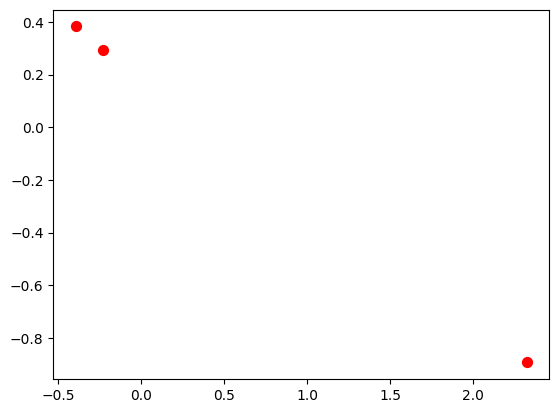

In [ ]:
#plt.figure(figsize=(5,5))
plt.scatter(scaled_features[0],scaled_features[1],s=50,c='red')

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

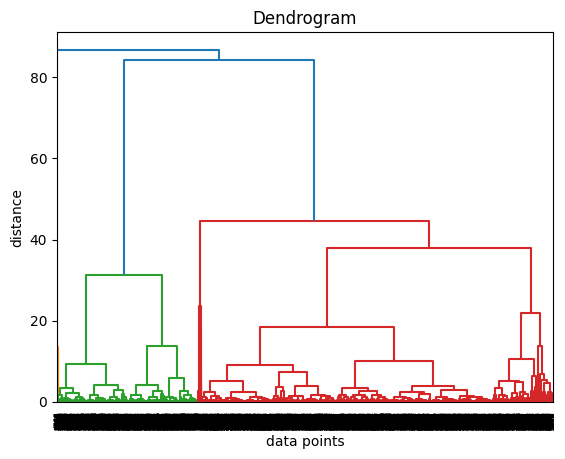

In [ ]:
dendrogram=sch.dendrogram(sch.linkage(scaled_features,method='ward'))
plt.title("Dendrogram")
plt.xlabel("data points")
plt.ylabel("distance")
plt.show()

In [ ]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [ ]:
out_hc=hc.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
out_hc

array([2, 1, 1, ..., 1, 1, 1])

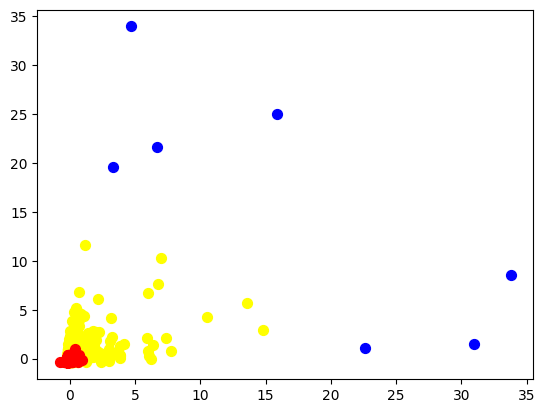

In [ ]:
plt.scatter(scaled_features[out_hc==0,0],scaled_features[out_hc==0,1],s=50,c='blue')
plt.scatter(scaled_features[out_hc==1,0],scaled_features[out_hc==1,1],s=50,c='yellow')
plt.scatter(scaled_features[out_hc==2,0],scaled_features[out_hc==2,1],s=50,c='red')

Conclusion: Through Agglomerative Clustering algorithm, the data is grouped into three distinct clusters. The red cluster appears to have very high level of similarity as data points tightly clustered together. The yellow cluster has some points which are spread out with most of the datapoints having high level of similarity. The blue cluster is the most dispersed, indicating less clear commonalities among its data points.